In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | ravar
Processing Record 3 of Set 1 | fukue
Processing Record 4 of Set 1 | port hedland
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | victor harbor
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | bhan
Processing Record 10 of Set 1 | mbumi
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | krasnoselkup
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | ponta delgada
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | kundiawa
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | ushuaia
Processing Rec

In [6]:
len(city_data)

583

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,39.25,91,20,6.91,AU,2022-07-21 21:28:32
1,Ravar,31.2656,56.8055,87.84,14,0,5.82,IR,2022-07-21 21:28:32
2,Fukue,32.6881,128.8419,77.45,75,59,13.87,JP,2022-07-21 21:28:33
3,Port Hedland,-20.3167,118.5667,59.05,94,0,6.91,AU,2022-07-21 21:28:33
4,San Patricio,28.0170,-97.5169,98.19,41,5,20.62,US,2022-07-21 21:28:34
...,...,...,...,...,...,...,...,...,...
578,Humaita,-7.5061,-63.0208,84.60,47,53,2.53,BR,2022-07-21 21:44:02
579,Oranjemund,-28.5500,16.4333,55.06,78,1,4.70,NA,2022-07-21 21:44:03
580,Faya,18.3851,42.4509,69.91,56,84,3.40,SA,2022-07-21 21:44:03
581,Marana,32.4367,-111.2254,108.77,26,0,9.22,US,2022-07-21 21:44:03


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [9]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-07-21 21:28:32,-42.8794,147.3294,39.25,91,20,6.91
1,Ravar,IR,2022-07-21 21:28:32,31.2656,56.8055,87.84,14,0,5.82
2,Fukue,JP,2022-07-21 21:28:33,32.6881,128.8419,77.45,75,59,13.87
3,Port Hedland,AU,2022-07-21 21:28:33,-20.3167,118.5667,59.05,94,0,6.91
4,San Patricio,US,2022-07-21 21:28:34,28.0170,-97.5169,98.19,41,5,20.62
...,...,...,...,...,...,...,...,...,...
578,Humaita,BR,2022-07-21 21:44:02,-7.5061,-63.0208,84.60,47,53,2.53
579,Oranjemund,NA,2022-07-21 21:44:03,-28.5500,16.4333,55.06,78,1,4.70
580,Faya,SA,2022-07-21 21:44:03,18.3851,42.4509,69.91,56,84,3.40
581,Marana,US,2022-07-21 21:44:03,32.4367,-111.2254,108.77,26,0,9.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

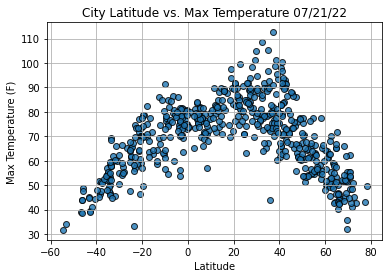

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

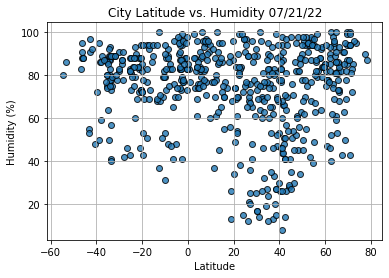

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

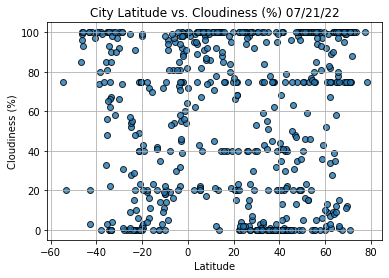

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

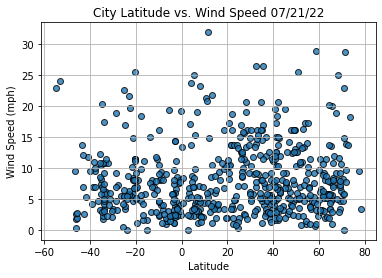

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()